In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
class Hopfield:
    def __init__(self, n, patterns, init = False, x = None, b = None, lr = 1):
        self.n = n
        self.lr = lr
        self.x = patterns[-1]
        self.patterns = patterns
        self.w = None
        self.b = b if b != None else np.zeros(n)
    
    def init_state(self, x):
        if (len(x) != self.n): 
            print('DimError: dimension of new state not equal to n')
            return
        self.x = x
        
    def train(self):
        n = self.n
        w = np.zeros((n, n))
        for p in self.patterns: 
            p = p.reshape((len(p), -1))
            w += self.lr * p @ p.T
            np.fill_diagonal(w, 0)
        self.w = w
        
    def update(self, iters = 100):
        c = 0
        for j in range(iters):
            i = np.random.randint(0, self.n)
            h = np.dot(self.w[i][:], self.x)
            if h >= 0: c+=1
            self.x[i] = 1 if h >=0 else -1
        return c
    
    def get_state(self):
        return self.x
    
    def energy(self):
        e = -0.5 * (self.x @ self.w @ self.x.T)/self.n
        return e 
    
    def error(self, i):
        return np.mean((self.x - self.patterns[i])**2)

In [22]:
def readImg2array(file, shape, threshold= 100):
    img = Image.open(file).convert(mode="L")
    img= img.resize(shape)
    #pilIN.thumbnail(size,Image.ANTIALIAS)
    imgArray = np.asarray(img,dtype=np.uint8)
    x = np.zeros(imgArray.shape,dtype=np.float64)
    x[imgArray > threshold] = 1
    x[x==0] = -1
    return x.flatten()

def array2Img(data, outFile = None):
    #data is 1 or -1 matrix
    y = np.zeros(data.shape,dtype=np.uint8)
    y[data==1] = 255
    y[data==-1] = 0
    img = Image.fromarray(y,mode="L")
    if outFile is not None:
        img.save(outFile)
    return img

def addNoise(file, shape, d = 3, threshold = 90):
    img = Image.open(file).convert(mode="L")
    img= np.asarray(img.resize(shape)).flatten()
    noise = np.random.uniform(-225/d, 255/d, img.shape)
    img = img + noise
    x = np.zeros(img.shape,dtype=np.float64)
    x[img > threshold] = 1
    x[x==0] = -1
    return x

In [18]:
iters = 500
shape = (100, 100)
train = []
for i in os.listdir('images/'):
    img = readImg2array('images/' + i, shape)
    train.append(img)


Stored memories:


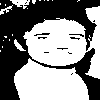

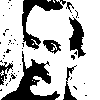

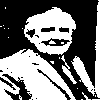

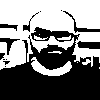

In [30]:
n = len(train[-1])
# test = np.random.choice([-1, 1], n)
print('Stored memories:')
for i in train:
    img1 = array2Img(i.reshape(shape))
    img1.show()


In [31]:
# n = 100
# test = np.random.choice([-1, 1], n)
# train = np.random.choice([-1, 1], n)
hop = Hopfield(len(train[-1]), train)
hop.train()


Stimulus:


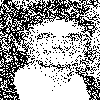

In [32]:
test = addNoise('images/1.jpg', shape, 2)
img2 = array2Img(test.reshape(shape))
print('Stimulus:')
img2.show()

In [33]:
hop.init_state(test)
energy = []
# forward pass
for i in range(iters):
    energy.append(hop.energy())
    k = hop.update()
    if i%100==0:
        print(i, energy[-1], k)

0 -1457.2382 54
100 -3700.5426 54
200 -4838.7886 51
300 -5278.627 54
400 -5478.9558 53


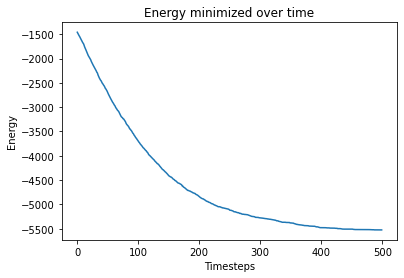

In [34]:
plt.xlabel('Timesteps')
plt.ylabel('Energy')
plt.title('Energy minimized over time')
plt.plot(range(len(energy)), energy)
plt.show()

Memory retrieved


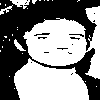

In [35]:
img = array2Img(hop.x.reshape(shape))
print('Memory retrieved')
img.show()